In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from pydantic import BaseModel
from typing import Optional

from sklearn.metrics import explained_variance_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


In [2]:
df = pd.read_csv("../figures/merged_validation_an.csv")
df.describe()

,Unnamed: 0,X,predicted_counts,prediction_prop,validation_counts,validation_prop
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,255.500000,5.500000,50.013725,0.100000,49.496980,0.098314
std,147.368586,2.875101,134.883497,0.259342,87.222918,0.164561
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,128.250000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,255.500000,5.500000,0.000000,0.000000,4.120000,0.010000
75%,382.750000,8.000000,6.750000,0.011885,69.442500,0.150000
max,510.000000,10.000000,830.000000,1.000000,684.950000,0.950000


In [3]:
df.head()

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site
0,1,1,Abiotic,0,0.000000,32.2,0.05,BisonGulch
1,2,2,Forb,31,0.048137,32.2,0.05,BisonGulch
2,3,3,Graminoid,0,0.000000,0.0,0.00,BisonGulch
3,4,4,Lichen,0,0.000000,32.2,0.05,BisonGulch
4,5,5,Moss,0,0.000000,32.2,0.05,BisonGulch


In [4]:
fg1_levels = df["key"].unique()
print(fg1_levels)

['Abiotic' 'Forb' 'Graminoid' 'Lichen' 'Moss' 'ShrubDecid'
 'ShrubEvergreen' 'TreeBroadleaf' 'TreeConifer' 'Unknown']


In [5]:
encoder = LabelEncoder()
df["site_code"] = encoder.fit_transform(df["site"])

In [6]:
df[["site","site_code"]].value_counts()

site         site_code
Chatanika    1            110
EightMile    2            110
MurphyDome   3            110
BisonGulch   0             90
twelveMile1  4             50
twelveMile2  5             40
dtype: int64

In [7]:
nodes = df["site_code"].unique()
print(nodes)
print(len(nodes))

colors = ['red', 'blue', 'yellow', 'violet', 'purple']

cmap = ListedColormap(colors, name="sites")

[0 1 2 3 4 5]
6


In [8]:
df.head(25)

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site,site_code
0,1,1,Abiotic,0,0.000000,32.20,0.05,BisonGulch,0
1,2,2,Forb,31,0.048137,32.20,0.05,BisonGulch,0
2,3,3,Graminoid,0,0.000000,0.00,0.00,BisonGulch,0
3,4,4,Lichen,0,0.000000,32.20,0.05,BisonGulch,0
4,5,5,Moss,0,0.000000,32.20,0.05,BisonGulch,0
5,6,6,ShrubDecid,0,0.000000,386.40,0.60,BisonGulch,0
6,7,7,ShrubEvergreen,0,0.000000,64.40,0.10,BisonGulch,0
7,8,8,TreeBroadleaf,0,0.000000,0.00,0.00,BisonGulch,0
8,9,9,TreeConifer,613,0.951863,64.40,0.10,BisonGulch,0
9,10,10,Unknown,0,0.000000,0.00,0.00,BisonGulch,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


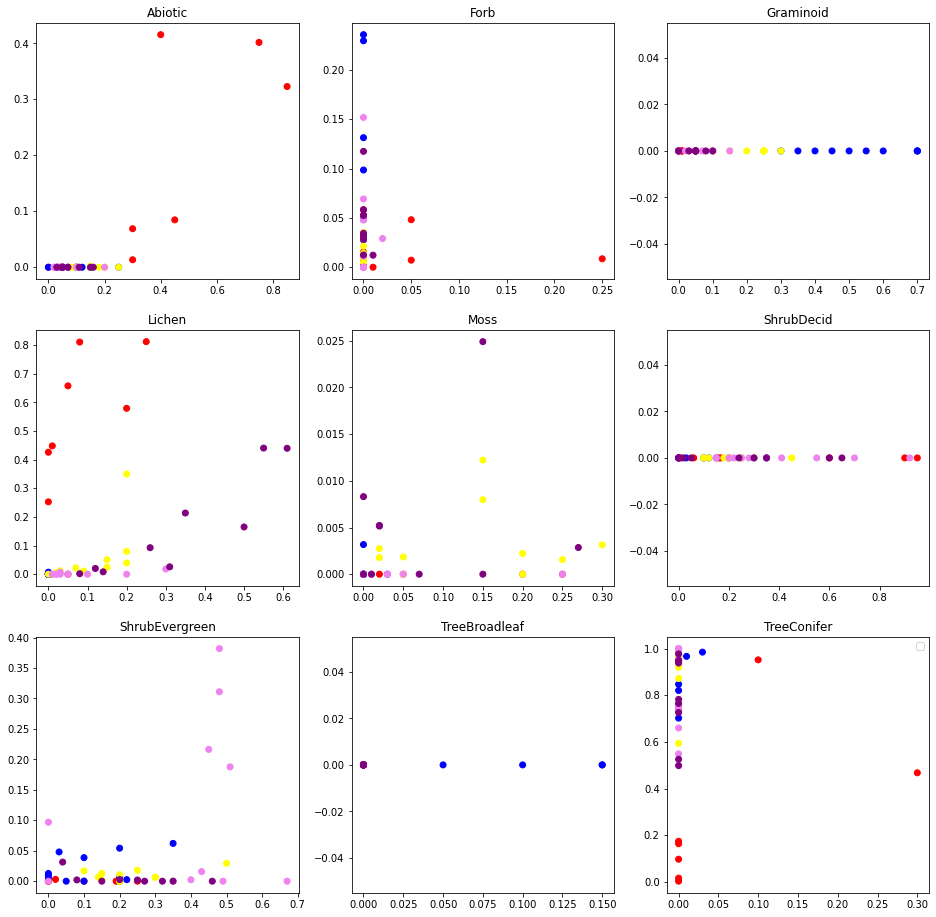

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,16))


ax[0][0].scatter(
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"],
    c=df[df["key"]=="Abiotic"]["site_code"],
    cmap=cmap)
ax[0][0].set_title("Abiotic")

ax[0][1].scatter(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"],
    c=df[df["key"]=="Forb"]["site_code"],
    cmap=cmap)
ax[0][1].set_title("Forb")

ax[0][2].scatter(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
    c=df[df["key"]=="Graminoid"]["site_code"],
    cmap = cmap)
ax[0][2].set_title("Graminoid")

ax[1][0].scatter(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"],
    c=df[df["key"]=="Lichen"]["site_code"],
    cmap = cmap)
ax[1][0].set_title("Lichen")

ax[1][1].scatter(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
    c=df[df["key"]=="Moss"]["site_code"],
    cmap = cmap)
ax[1][1].set_title("Moss")

ax[1][2].scatter(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"],
    c=df[df["key"]=="ShrubDecid"]["site_code"],
    cmap = cmap)
ax[1][2].set_title("ShrubDecid")

ax[2][0].scatter(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"],
    c=df[df["key"]=="ShrubEvergreen"]["site_code"],
    cmap = cmap)
ax[2][0].set_title("ShrubEvergreen")

ax[2][1].scatter(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"],
    c=df[df["key"]=="TreeBroadleaf"]["site_code"],
    cmap = cmap)
ax[2][1].set_title("TreeBroadleaf")

ax[2][2].scatter(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"],
    c=df[df["key"]=="TreeConifer"]["site_code"],
    cmap = cmap)
ax[2][2].set_title("TreeConifer")

plt.legend(
    
)

plt.show()


In [10]:
class ValidationResult(BaseModel):
    r2: float
    explained_variance: float
    intercept: float
    slope: float

    

In [11]:
def get_validation_stats(true: pd.Series, pred: pd.Series) -> ValidationResult:
    model = LinearRegression()
    model.fit(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    score = model.score(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    explained_variance = explained_variance_score(true.values.reshape(-1,1), pred.values.reshape(-1,1))
    return ValidationResult(
        r2 = score, 
        explained_variance = explained_variance, 
        intercept = model.intercept_,
        slope = model.coef_
    )

def pretty_print_results(result: ValidationResult, header: Optional[str] = None) -> None:
    indent = ""
    if(header is not None):
        print(header)
        indent = "\t"
    print(f"{indent}R-squared:\t\t{result.r2}")
    print(f"{indent}Explained Variance:\t{result.explained_variance}")
    print(f"{indent}Intercept:\t\t{result.intercept}")
    print(f"{indent}Slope:\t\t\t{result.slope}")


In [12]:
result = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

In [13]:
pretty_print_results(result, "Test")

Test
	R-squared:		0.672460704987776
	Explained Variance:	0.6007393028232276
	Intercept:		0.10405421878710701
	Slope:			1.4849596124299815


In [14]:
abiotic = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

forb = get_validation_stats( 
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"])

graminoid = get_validation_stats(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
)

lichen = get_validation_stats(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"]
)

moss = get_validation_stats(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
)

shrub_decid = get_validation_stats(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"]
)

shrub_evergreen = get_validation_stats(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"]
)

tree_broadleaf = get_validation_stats(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"]
)

tree_conifer = get_validation_stats(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"]
)

In [15]:
pretty_print_results(abiotic, "Abiotic:")
pretty_print_results(forb, "Forb:")
pretty_print_results(graminoid, "Graminoid:")
pretty_print_results(lichen, "Lichen:")
pretty_print_results(moss, "Moss:")
pretty_print_results(shrub_decid, "Deciduous Shrubs:")
pretty_print_results(shrub_evergreen, "Evergreen Shrub")
pretty_print_results(tree_broadleaf, "Broadleaf Tree")
pretty_print_results(tree_conifer, "Coniferous Tree")

Abiotic:
	R-squared:		0.672460704987776
	Explained Variance:	0.6007393028232276
	Intercept:		0.10405421878710701
	Slope:			1.4849596124299815
Forb:
	R-squared:		0.009735202237060592
	Explained Variance:	-2.3700020561423423
	Intercept:		0.010254711424589006
	Slope:			-0.06833033402334064
Graminoid:
	R-squared:		0.0
	Explained Variance:	0.0
	Intercept:		0.16882352941176473
	Slope:			0.0
Lichen:
	R-squared:		0.1294667555899871
	Explained Variance:	-1.1421187284472594
	Intercept:		0.07967681559947717
	Slope:			0.24189872474938962
Moss:
	R-squared:		0.06579153779725355
	Explained Variance:	0.021692323052424634
	Intercept:		0.05002754456425139
	Slope:			5.5160420760935915
Deciduous Shrubs:
	R-squared:		0.0
	Explained Variance:	0.0
	Intercept:		0.26254901960784316
	Slope:			0.0
Evergreen Shrub
	R-squared:		0.15229481734239836
	Explained Variance:	0.14863573575316735
	Intercept:		0.1900755771832733
	Slope:			0.8657977124911851
Broadleaf Tree
	R-squared:		0.0
	Explained Variance:	0.0
	Intercept

In [16]:
abiotic_evs = explained_variance_score( 
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

abiotic_model = LinearRegression(fit_intercept = True)
abiotic_model.fit(
    df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

print(abiotic_model.get_params())

abiotic_r2 = abiotic_model.score(df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

forb_r2 = explained_variance_score(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"]
)

print("Explained Variance by PFT")
print("Abiotic:")
print(f"\tExplained Variance:\t{abiotic_evs}")
print(f"\tR-Squared:\t\t{abiotic_r2}")
print(f"Forb: \t\t\t{forb_r2}")

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Explained Variance by PFT
Abiotic:
	Explained Variance:	0.6007393028232276
	R-Squared:		0.672460704987776
Forb: 			-2.3700020561423423


site         site_code
MurphyDome   3            120
Chatanika    1            110
EightMile    2            110
BisonGulch   0             90
twelveMile1  4             50
twelveMile2  5             40


In [17]:
bison_gulch = get_validation_stats(
    df[df["site_code"] == 0]["validation_prop"],
    df[df["site_code"] == 0]["prediction_prop"]

)

pretty_print_results(bison_gulch, "Bison Gulch:")

chatanika = get_validation_stats(
    df[df["site_code"] == 1]["validation_prop"],
    df[df["site_code"] == 1]["prediction_prop"]

)
pretty_print_results(chatanika, "Chatanika")

eight_mile = get_validation_stats(
    df[df["site_code"] == 2]["validation_prop"],
    df[df["site_code"] == 2]["prediction_prop"]

)
pretty_print_results(eight_mile, "Eight Mile")
murphy_dome = get_validation_stats(
    df[df["site_code"] == 3]["validation_prop"],
    df[df["site_code"] == 3]["prediction_prop"]

)
pretty_print_results(murphy_dome, "Murphy Dome")

twelve_mile_1 = get_validation_stats(
    df[df["site_code"] == 4]["validation_prop"],
    df[df["site_code"] == 4]["prediction_prop"]

)
pretty_print_results(twelve_mile_1, "Twelve Mile (1)")

twelve_mile_2 = get_validation_stats(
    df[df["site_code"] == 5]["validation_prop"],
    df[df["site_code"] == 5]["prediction_prop"]
)

pretty_print_results(twelve_mile_2, "Twelve Mile (2)")



Bison Gulch:
	R-squared:		0.01864189637668201
	Explained Variance:	-0.9812661961963198
	Intercept:		0.08798622027625524
	Slope:			0.12013779723744757
Chatanika
	R-squared:		0.03554652065970121
	Explained Variance:	-3.328789471894641
	Intercept:		0.10236565881619461
	Slope:			-0.11456567907103696
Eight Mile
	R-squared:		0.0784738866631256
	Explained Variance:	-7.502388971148026
	Intercept:		0.11132667674951388
	Slope:			-0.113266767495139
Murphy Dome
	R-squared:		0.011785622664967743
	Explained Variance:	-2.460271894365958
	Intercept:		0.10741684811573037
	Slope:			-0.07416848115730348
Twelve Mile (1)
	R-squared:		0.004079717839099328
	Explained Variance:	-1.8834633447135332
	Intercept:		0.09755746117277166
	Slope:			0.044425388272283546
Twelve Mile (2)
	R-squared:		0.034139552813506
	Explained Variance:	-3.512500877782168
	Intercept:		0.11187846277537086
	Slope:			-0.10878462775370852


In [18]:
output_filepath = "../Output/r2_pft_site_table.csv"

sites = df["site"].unique()
header = ",".join(fg1_levels)
lines = [header]



lm = LinearRegression()
for site in sites:
    line = [str(site)]
    for pft in fg1_levels:
        filtered_data_it = df.where(df["site"] == site).dropna()
        filtered_data = filtered_data_it.where(filtered_data_it["key"] == pft).dropna()
        lm.fit(
            filtered_data["prediction_prop"].values.reshape((-1,1)),
            filtered_data["validation_prop"].values.reshape((-1,1)))
        r2_score = lm.score(
            filtered_data["prediction_prop"].values.reshape((-1,1)),
            filtered_data["validation_prop"].values.reshape((-1,1))
        )

        print(f"Predicted {r2_score}")

        line.append(str(r2_score))

    line_text = ",".join(line)
    lines.append(line_text)

csv_text = "\n".join(lines)

with open(output_filepath, "w") as f:
    f.write(csv_text)

        

Predicted 0.6317183019305432
Predicted 0.004666678798558754
Predicted 0.0
Predicted 0.3615055817488384
Predicted 0.0
Predicted 0.0
Predicted 0.0975750577367207
Predicted 1.0
Predicted 0.05978992472307054
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.009999999999999898
Predicted 0.0
Predicted 0.21051710274704538
Predicted 0.0
Predicted 0.11467041776392284
Predicted 1.0
Predicted 0.005868544600938885
Predicted 1.0
Predicted 0.0
Predicted 0.3384756057887768
Predicted 0.03767325423000856
Predicted 0.0
Predicted 0.2906130097714027
Predicted 1.0
Predicted 1.0
Predicted 1.0
Predicted 0.0
Predicted 0.0011948948696463013
Predicted 0.0
Predicted 0.4886385481299489
Predicted 0.0
Predicted 0.0
Predicted 0.04751560997046789
Predicted 1.0
Predicted 1.0
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.0
Predicted 0.7983140642410653
Predicted 0.03675835840878383
Predicted 0.0
Predicted 0.0
Predicted 1.0
Predicted 1.0
Predicted 1.0
Predicted 0.0
Predicted 0.2308